In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

In [2]:
df = pd.read_csv("training.csv", delimiter=',')

In [3]:
#Scrivere a cosa si riferiscono le variabili
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [4]:
df2 = df[df["Make"]=="KIA"]
df2 = df2[df2["Model"]=="SPECTRA"]
df2 = df2[df2["SubModel"]=="4D SEDAN EX"]

df2[['RefId','IsBadBuy','VehYear','VehicleAge','Make','Model','SubModel','VehOdo','PurchDate','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice','MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice','MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice','VehBCost']]

,RefId,IsBadBuy,VehYear,VehicleAge,Make,Model,SubModel,VehOdo,PurchDate,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VehBCost
6,7,0,2004,5,KIA,SPECTRA,4D SEDAN EX,65328,12/7/2009,2966.0,4038.0,6240.0,8496.0,2980.0,4115.0,6230.0,8603.0,4200.0
8,9,0,2007,2,KIA,SPECTRA,4D SEDAN EX,49921,12/7/2009,6196.0,7274.0,9687.0,10624.0,6417.0,7371.0,9637.0,10778.0,5600.0
145,146,0,2007,3,KIA,SPECTRA,4D SEDAN EX,44367,3/1/2010,6132.0,7138.0,9678.0,10778.0,6238.0,7267.0,9580.0,10269.0,6300.0
235,236,0,2005,5,KIA,SPECTRA,4D SEDAN EX,68550,5/3/2010,4299.0,5337.0,7237.0,8492.0,3652.0,4612.0,5962.0,7529.0,4800.0
325,326,1,2008,2,KIA,SPECTRA,4D SEDAN EX,61184,10/25/2010,6796.0,7555.0,10140.0,10805.0,6628.0,7535.0,9605.0,10650.0,6100.0
413,414,0,2005,5,KIA,SPECTRA,4D SEDAN EX,25830,12/20/2010,3384.0,4491.0,6170.0,8136.0,3638.0,4681.0,6560.0,7436.0,6050.0
918,920,0,2007,2,KIA,SPECTRA,4D SEDAN EX,47866,12/8/2009,6196.0,7274.0,9687.0,10624.0,6417.0,7371.0,9637.0,10778.0,6525.0
958,960,0,2007,3,KIA,SPECTRA,4D SEDAN EX,41522,1/26/2010,5599.0,6712.0,9379.0,10651.0,6209.0,7213.0,9762.0,10860.0,6120.0
983,985,0,2007,3,KIA,SPECTRA,4D SEDAN EX,35790,2/9/2010,5784.0,6868.0,9442.0,10355.0,5892.0,6975.0,9276.0,10170.0,6525.0
989,991,0,2005,5,KIA,SPECTRA,4D SEDAN EX,58607,2/23/2010,4024.0,4719.0,7526.0,8825.0,4049.0,5051.0,6833.0,8052.0,6090.0


In [5]:
df.dtypes

RefId                                  int64
IsBadBuy                               int64
PurchDate                             object
Auction                               object
VehYear                                int64
VehicleAge                             int64
Make                                  object
Model                                 object
Trim                                  object
SubModel                              object
Color                                 object
Transmission                          object
WheelTypeID                          float64
WheelType                             object
VehOdo                                 int64
Nationality                           object
Size                                  object
TopThreeAmericanName                  object
MMRAcquisitionAuctionAveragePrice    float64
MMRAcquisitionAuctionCleanPrice      float64
MMRAcquisitionRetailAveragePrice     float64
MMRAcquisitonRetailCleanPrice        float64
MMRCurrent

In [6]:
df.describe()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
count,72983.000000,72983.000000,72983.000000,72983.000000,69814.000000,72983.000000,72965.000000,72965.000000,72965.000000,72965.000000,72668.000000,72668.000000,72668.000000,72668.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,36511.428497,0.122988,2005.343052,4.176644,1.494299,71499.995917,6128.909217,7373.636031,8497.034332,9850.928240,6132.081287,7390.681827,8775.723331,10145.385314,26345.842155,58043.059945,6730.934326,0.025280,1276.580985
std,21077.241302,0.328425,1.731252,1.712210,0.521290,14578.913128,2461.992768,2722.491986,3156.285284,3385.789541,2434.567723,2686.248852,3090.702941,3310.254351,25717.351219,26151.640415,1767.846435,0.156975,598.846788
min,1.000000,0.000000,2001.000000,0.000000,0.000000,4825.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,835.000000,2764.000000,1.000000,0.000000,462.000000
25%,18257.500000,0.000000,2004.000000,3.000000,1.000000,61837.000000,4273.000000,5406.000000,6280.000000,7493.000000,4275.000000,5414.000000,6536.000000,7784.000000,17212.000000,32124.000000,5435.000000,0.000000,837.000000
50%,36514.000000,0.000000,2005.000000,4.000000,1.000000,73361.000000,6097.000000,7303.000000,8444.000000,9789.000000,6062.000000,7313.000000,8729.000000,10103.000000,19662.000000,73108.000000,6700.000000,0.000000,1155.000000
75%,54764.500000,0.000000,2007.000000,5.000000,2.000000,82436.000000,7765.000000,9021.000000,10651.000000,12088.000000,7736.000000,9013.000000,10911.000000,12309.000000,22808.000000,80022.000000,7900.000000,0.000000,1623.000000
max,73014.000000,1.000000,2010.000000,9.000000,3.000000,115717.000000,35722.000000,36859.000000,39080.000000,41482.000000,35722.000000,36859.000000,39080.000000,41062.000000,99761.000000,99224.000000,45469.000000,1.000000,7498.000000


In [7]:
df.corr()

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
RefId,1.000000,0.023973,0.010580,-0.025404,0.013110,-0.026553,-0.011568,-0.015704,-0.032208,-0.034324,-0.008742,-0.013015,-0.021616,-0.024369,0.032896,0.131898,-0.011873,-0.048851,-0.023478
IsBadBuy,0.023973,1.000000,-0.158886,0.167164,-0.044620,0.082560,-0.109252,-0.102954,-0.087418,-0.083665,-0.109112,-0.104020,-0.103914,-0.100245,-0.061488,0.005796,-0.099911,-0.003697,0.052319
VehYear,0.010580,-0.158886,1.000000,-0.957957,0.259660,-0.283719,0.581146,0.532927,0.581191,0.539230,0.590820,0.548426,0.598490,0.558669,0.280791,0.068276,0.349965,0.057380,-0.268696
VehicleAge,-0.025404,0.167164,-0.957957,1.000000,-0.250801,0.319794,-0.565690,-0.518810,-0.460854,-0.426382,-0.575607,-0.532505,-0.504062,-0.469359,-0.268269,-0.074857,-0.312329,-0.024771,0.259310
WheelTypeID,0.013110,-0.044620,0.259660,-0.250801,1.000000,-0.213558,-0.095471,-0.129597,-0.072700,-0.102019,-0.088597,-0.121211,-0.074420,-0.102488,0.187199,0.007901,-0.162826,-0.006747,-0.132798
VehOdo,-0.026553,0.082560,-0.283719,0.319794,-0.213558,1.000000,-0.017022,0.024617,0.031306,0.063165,-0.028568,0.012107,0.015811,0.048005,-0.288456,-0.053041,-0.062008,0.029556,0.411718
MMRAcquisitionAuctionAveragePrice,-0.011568,-0.109252,0.581146,-0.565690,-0.095471,-0.017022,1.000000,0.990347,0.910391,0.910187,0.937817,0.932492,0.871755,0.871042,0.107734,0.045694,0.789840,0.038818,-0.050417
MMRAcquisitionAuctionCleanPrice,-0.015704,-0.102954,0.532927,-0.518810,-0.129597,0.024617,0.990347,1.000000,0.902718,0.918242,0.923610,0.932114,0.860716,0.871203,0.062502,0.040675,0.781516,0.038667,-0.020644
MMRAcquisitionRetailAveragePrice,-0.032208,-0.087418,0.581191,-0.460854,-0.072700,0.031306,0.910391,0.902718,1.000000,0.990201,0.851647,0.849407,0.913108,0.906054,0.107516,0.035489,0.746126,0.080627,-0.053444
MMRAcquisitonRetailCleanPrice,-0.034324,-0.083665,0.539230,-0.426382,-0.102019,0.063165,0.910187,0.918242,0.990201,1.000000,0.846914,0.855689,0.903188,0.906810,0.069676,0.031284,0.744966,0.077670,-0.026933


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e8d9ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f5d5bd0>]], dtype=object)

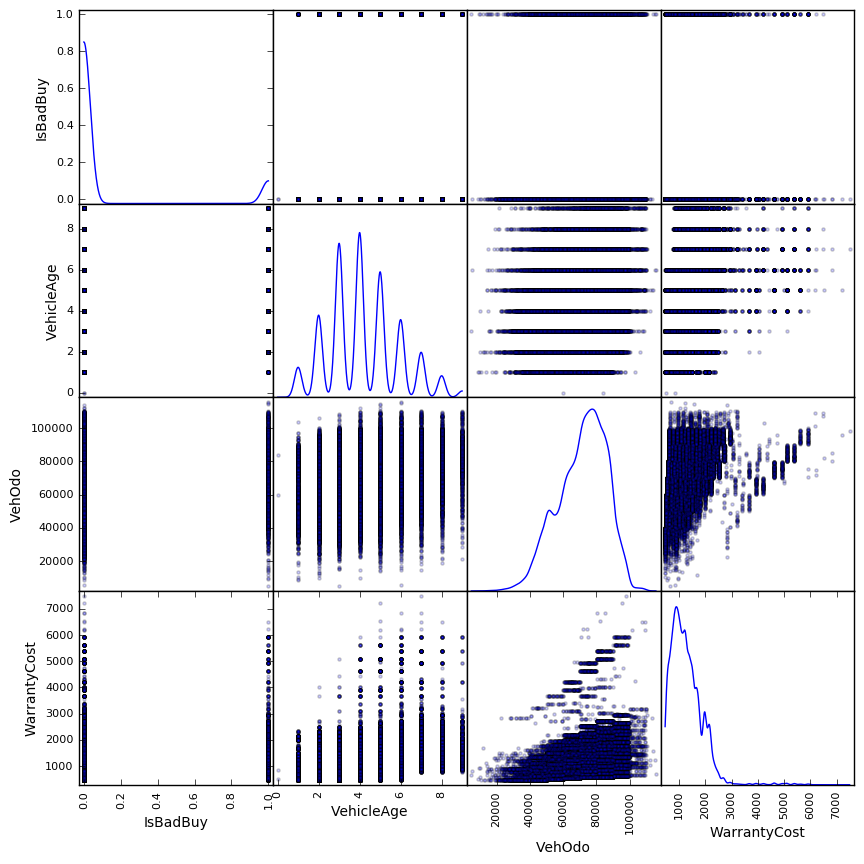

In [9]:
pd.scatter_matrix(df[['IsBadBuy','VehicleAge','VehOdo','WarrantyCost']], alpha=0.2, figsize=(10, 10), diagonal='kde')

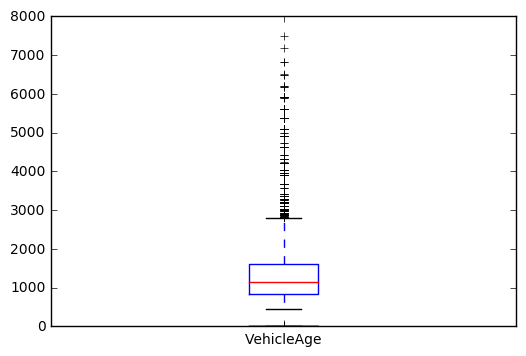

In [17]:
df['WarrantyCost'].plot(kind='box')
df['VehicleAge'].plot(kind='box')


AttributeError: 'Series' object has no attribute 'boxplot'

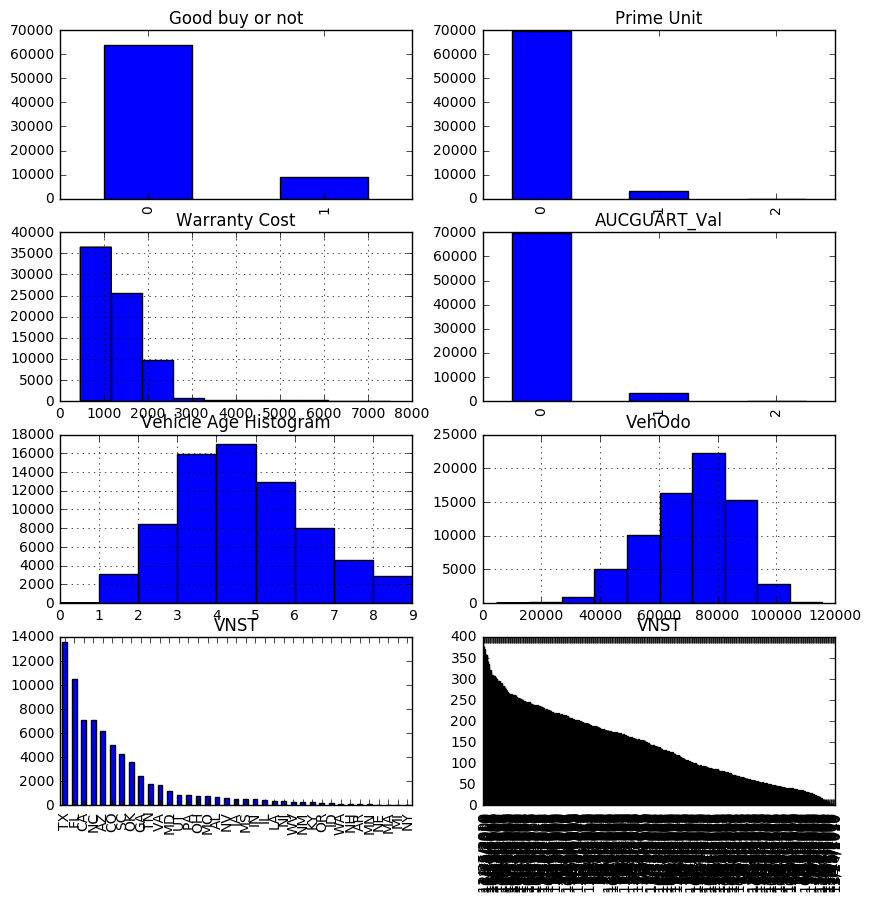

In [11]:
data = sorted(df['PRIMEUNIT'].unique())
prime_mapping = dict(zip(data, range(0, len(data) + 1)))
df['PRIMEUNIT_Val'] = df['PRIMEUNIT'].map(prime_mapping).astype(int)

data = sorted(df['AUCGUART'].unique())
aucguart_mapping = dict(zip(data, range(0, len(data) + 1)))
df['AUCGUART_Val'] = df['AUCGUART'].map(aucguart_mapping).astype(int)

data = sorted(df['PurchDate'].unique())
purchdate_mapping = dict(zip(data, range(0, len(data) + 1)))
df['PurchDate_Val'] = df['PurchDate'].map(purchdate_mapping).astype(int)

fig = plt.figure(figsize=(10, 10))
fig_dims = (4, 2)

plt.subplot2grid(fig_dims, (0, 0))
df['IsBadBuy'].value_counts().plot(kind='bar', title='Good buy or not')

plt.subplot2grid(fig_dims, (0, 1))
df['PRIMEUNIT_Val'].value_counts().plot(kind='bar', title='Prime Unit')

plt.subplot2grid(fig_dims, (1, 0))
df['WarrantyCost'].hist()
plt.title('Warranty Cost')

plt.subplot2grid(fig_dims, (1, 1))
df['AUCGUART_Val'].value_counts().plot(kind='bar', title='AUCGUART_Val')

plt.subplot2grid(fig_dims, (2, 0))
df['VehicleAge'].hist(bins=9)
plt.title('Vehicle Age Histogram')

plt.subplot2grid(fig_dims, (2, 1))
df['VehOdo'].hist()
plt.title('VehOdo')

plt.subplot2grid(fig_dims, (3, 0))
df['VNST'].value_counts().plot(kind='bar', title='VNST')

plt.subplot2grid(fig_dims, (3, 1))
df['PurchDate'].value_counts().plot(kind='bar', title='VNST')

In [32]:
pclass_xt = pd.crosstab(df['VehicleAge'], df['IsBadBuy'])
pclass_xt

IsBadBuy,0,1
VehicleAge,,
1,66,6
2,665,45
3,1103,110
4,1149,124
5,864,138
6,480,106
7,259,82
8,138,42
9,41,14


In [33]:
pclass_xt_pct = pclass_xt.div(pclass_xt.sum(1).astype(float), axis=0)
pclass_xt_pct

IsBadBuy,0,1
VehicleAge,,
1,0.916667,0.083333
2,0.936620,0.063380
3,0.909316,0.090684
4,0.902592,0.097408
5,0.862275,0.137725
6,0.819113,0.180887
7,0.759531,0.240469
8,0.766667,0.233333
9,0.745455,0.254545


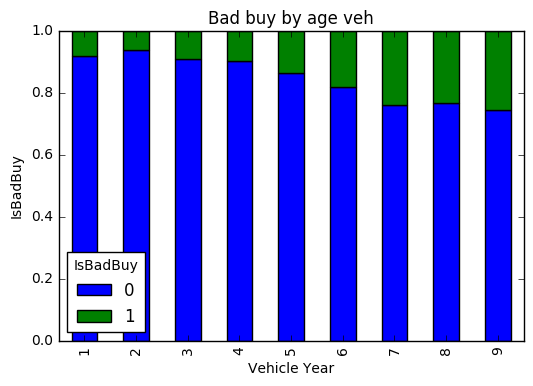

In [34]:
pclass_xt_pct.plot(kind='bar', stacked=True, title='Bad buy by age veh')
plt.xlabel('Vehicle Year')
plt.ylabel('IsBadBuy')

{'VOLVO': 27, 'SATURN': 21, 'DODGE': 4, 'SCION': 22, 'ISUZU': 10, 'JEEP': 11, 'HONDA': 7, 'HYUNDAI': 8, 'MAZDA': 14, 'CHEVROLET': 2, 'SUZUKI': 24, 'VOLKSWAGEN': 26, 'MERCURY': 15, 'MINI': 16, 'LINCOLN': 13, 'CHRYSLER': 3, 'GMC': 6, 'CADILLAC': 1, 'FORD': 5, 'SUBARU': 23, 'INFINITI': 9, 'MITSUBISHI': 17, 'PONTIAC': 20, 'NISSAN': 18, 'TOYOTA': 25, 'OLDSMOBILE': 19, 'BUICK': 0, 'KIA': 12}


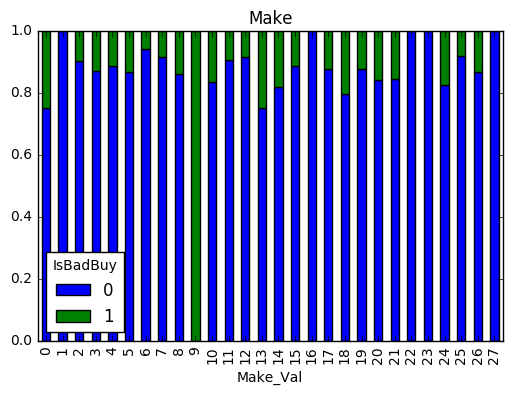

In [35]:
makes = sorted(df['Make'].unique())
make_mapping = dict(zip(makes, range(0, len(makes) + 1)))
df['Make_Val'] = df['Make'].map(make_mapping).astype(int)

print(make_mapping)

make_val_xt = pd.crosstab(df['Make_Val'], df['IsBadBuy'])
make_val_xt_pct = make_val_xt.div(make_val_xt.sum(1).astype(float), axis=0)
make_val_xt_pct.plot(kind='bar', stacked=True, title='Make')

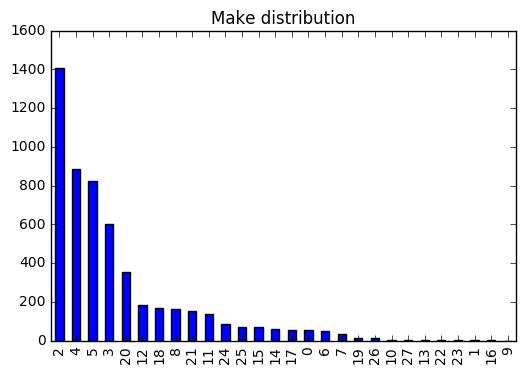

In [36]:
df['Make_Val'].value_counts().plot(kind='bar', title='Make distribution')

{'COMPACT': 0, 'LARGE SUV': 3, 'MEDIUM': 5, 'VAN': 11, 'SPECIALTY': 9, 'CROSSOVER': 1, 'LARGE': 2, 'MEDIUM SUV': 6, 'SMALL TRUCK': 8, 'SPORTS': 10, 'SMALL SUV': 7, 'LARGE TRUCK': 4}


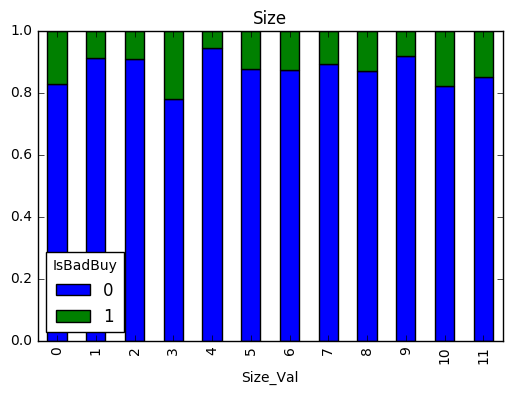

In [37]:
sizes = sorted(df['Size'].unique())
size_mapping = dict(zip(sizes, range(0, len(sizes) + 1)))
df['Size_Val'] = df['Size'].map(size_mapping).astype(int)

print(size_mapping)

size_val_xt = pd.crosstab(df['Size_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Size')

{'OTHER': 2, 'MANHEIM': 1, 'ADESA': 0}


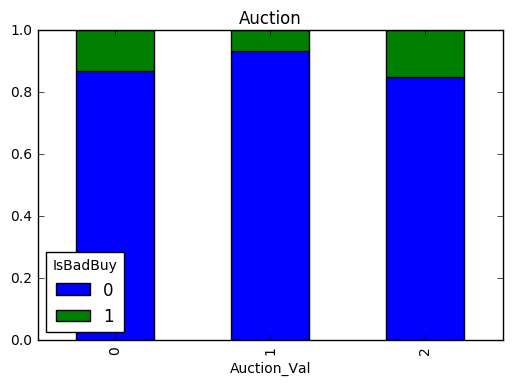

In [38]:
auctions = sorted(df['Auction'].unique())
auction_mapping = dict(zip(auctions, range(0, len(auctions) + 1)))
df['Auction_Val'] = df['Auction'].map(auction_mapping).astype(int)

print(auction_mapping)

size_val_xt = pd.crosstab(df['Auction_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Auction')

{'AMERICAN': 0, 'OTHER': 1, 'OTHER ASIAN': 2, 'TOP LINE ASIAN': 3}


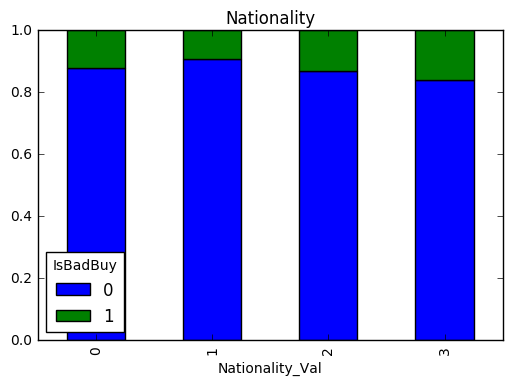

In [39]:
nationalities = sorted(df['Nationality'].unique())
nationality_mapping = dict(zip(nationalities, range(0, len(nationalities) + 1)))
df['Nationality_Val'] = df['Nationality'].map(nationality_mapping).astype(int)

print(nationality_mapping)

size_val_xt = pd.crosstab(df['Nationality_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Nationality')

{'GM': 2, 'OTHER': 3, 'CHRYSLER': 0, 'FORD': 1}


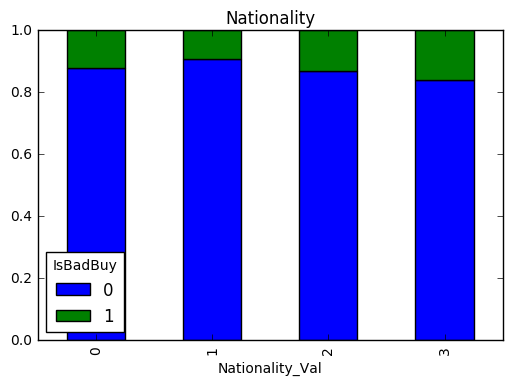

In [40]:
topthree = sorted(df['TopThreeAmericanName'].unique())
topthree_mapping = dict(zip(topthree, range(0, len(topthree) + 1)))
df['TopThreeAmericanName_Val'] = df['TopThreeAmericanName'].map(topthree_mapping).astype(int)

print(topthree_mapping)

size_val_xt = pd.crosstab(df['Nationality_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Nationality')

{nan: 0, 'Alloy': 1, 'Special': 3, 'Covers': 2}


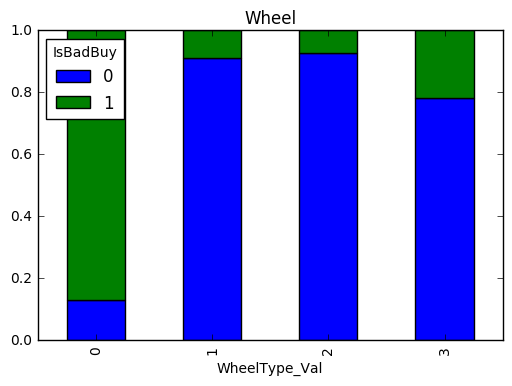

In [41]:
wheel = sorted(df['WheelType'].unique())
wheel_mapping = dict(zip(wheel, range(0, len(wheel) + 1)))
df['WheelType_Val'] = df['WheelType'].map(wheel_mapping).astype(int)

print(wheel_mapping)

size_val_xt = pd.crosstab(df['WheelType_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Wheel')

{'AUTO': 0, 'MANUAL': 1}


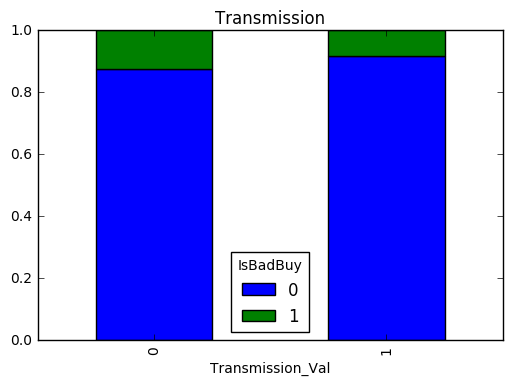

In [42]:
transmissions = sorted(df['Transmission'].unique())
transmission_mapping = dict(zip(transmissions, range(0, len(transmissions) + 1)))
df['Transmission_Val'] = df['Transmission'].map(transmission_mapping).astype(int)

print(transmission_mapping)

size_val_xt = pd.crosstab(df['Transmission_Val'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Transmission')

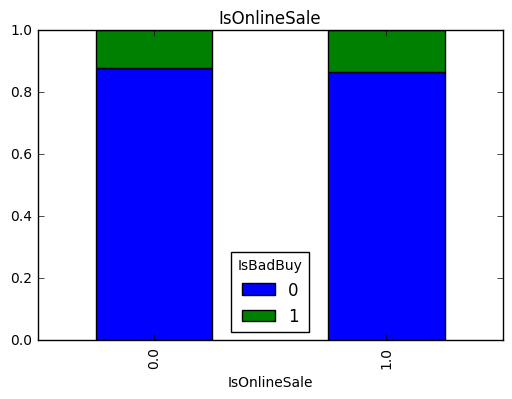

In [43]:
size_val_xt = pd.crosstab(df['IsOnlineSale'], df['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='IsOnlineSale')

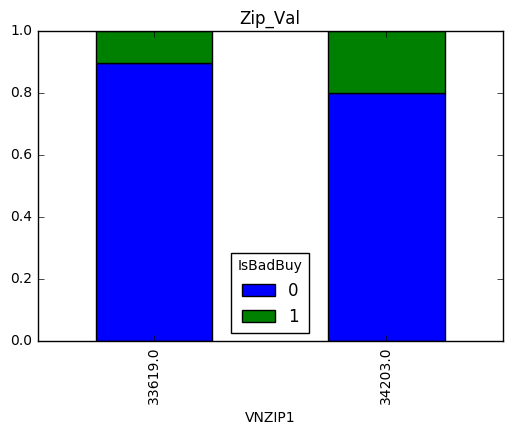

In [44]:
df2 = df[df["VNST"]=="FL"]

size_val_xt = pd.crosstab(df2['VNZIP1'], df2['IsBadBuy'])
size_val_xt_pct = size_val_xt.div(size_val_xt.sum(1).astype(float), axis=0)
size_val_xt_pct.plot(kind='bar', stacked=True, title='Zip_Val')

In [4]:
df2 = df[df["IsBadBuy"]==1]
pclass_xt = pd.crosstab(df2['Make'], df2['IsBadBuy'])
pclass_xt

IsBadBuy,1
Make,
BUICK,14
CHEVROLET,138
CHRYSLER,78
DODGE,101
FORD,109
GMC,3
HONDA,3
HYUNDAI,23
INFINITI,1
